**EDA Probabilitas dan Statistika**<br>
**Nama**  : Erwan Poltak Halomoan <br>
**NIM**   : 18222028<br>
**Kelas** : STI - K02<br>

**Data**   : Survey eChannel, eCommerce, eLifestyle & Fraud/ Penipuan Digital 2023<br>
**Format** : CSV<br>
**Size**  : 500kb<br>

# **Libraries and Data Load**

In [605]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy.stats as st
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns
from scipy.special import ndtri
from matplotlib.lines import Line2D

df = pd.read_csv("18222028 CSV.csv")

df[0:5]

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Pria,19,S1,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,Bogor,1000%,Ya,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
1,Pria,47,S2,Karyawan Swasta,> Rp 10 juta,Depok,1400%,Ya,Delivery Makanan,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
2,Pria,31,S2,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Bandung,400%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
3,Pria,65,S1,Pengusaha,> Rp 10 juta,Jakarta,300%,Tidak,NaN,Mobile Banking,...,NaN,NaN,NaN,menggunakan fitur Paylater,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,Saldo eMoney/ eWallet berkurang tanpa melakuka...
4,Pria,19,S1,Pelajar / Mahasiswa,< Rp 2 juta,Padang,1000%,Sama saja,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN


# **Pre-Exploratory**

### **Dimensi dan Informasi Data**

In [606]:
# Dimensi Data
print(f"Banyak kolom pada dataset: {df.shape[1]}")
print(f"Banyak baris pada dataset: {df.shape[0]}")
print(f"Banyak data pada dataset: {df.size}\n")

print(df.info())
print(df.describe())

Banyak kolom pada dataset: 150
Banyak baris pada dataset: 277
Banyak data pada dataset: 41550

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Columns: 150 entries, Jenis Kelamin to keluhan_belanja_online_6
dtypes: int64(1), object(149)
memory usage: 324.7+ KB
None
               Usia
count  2.770000e+02
mean   1.380562e+05
std    2.297081e+06
min    1.500000e+01
25%    1.900000e+01
50%    2.400000e+01
75%    4.300000e+01
max    3.823108e+07


### **Unique Values**

In [607]:
pd.DataFrame(df.select_dtypes("object").nunique(), columns = ['Unique Values'])

,Unique Values
Jenis Kelamin,2
Pendidikan Terakhir,8
Pekerjaan,18
Penghasilan per Bulan,4
Domisili,53
...,...
keluhan_belanja_online_2,1
keluhan_belanja_online_3,1
keluhan_belanja_online_4,1
keluhan_belanja_online_5,1


### **Missing Values**

In [608]:
# Cek data missing value
(df.isna().sum()*100)/df.shape[0]

Jenis Kelamin                0.000000
Usia                         0.000000
Pendidikan Terakhir          0.000000
Pekerjaan                    0.000000
Penghasilan per Bulan        0.000000
                              ...    
keluhan_belanja_online_2    73.646209
keluhan_belanja_online_3    68.592058
keluhan_belanja_online_4    83.032491
keluhan_belanja_online_5    89.169675
keluhan_belanja_online_6    95.306859
Length: 150, dtype: float64

Didapatkan bahwa dataset berjumlah 277 baris dan 150 Kolom yang memiliki tipe data integer dan object yang masing-masing berjumlah 1,dan 149.

# **Data Cleaning**

### **Penangangan Data Kosong (NULL)**

Data yang bernilai NULL tidak dilakukan tindakan apapun karena berpengaruh ke tipe data yang ada dalam 1 atribut. Hampir seluruh atribut bertipe data string sehingga proses pengisian kolom yang bernilai NULL dengan angka (misalnya 0) justru akan membuat ambiguitas dan pengolahan data tidak dapat dilakukan.

### **Penanganan Outliers**

Didapatkan data umur yang tidak valid (>100 tahun) sehingga saya ubah menggunakan rata-rata umur valid seluruhnya (<100 tahun). Hal ini diasumsikan valid karena data yang diubah hanya 0,72% yang perubahannya tidak berdampak signifikan pada kualitas data.

In [609]:
df.loc[df['Usia']>100, 'Usia']

192    38231084
274        1980
Name: Usia, dtype: int64

In [610]:
rata_rata_umur_valid = (df[df['Usia'] <= 100]['Usia']).mean()
df['Usia'] = df['Usia'].apply(lambda x: x if x <= 100 else rata_rata_umur_valid)

# Mengubah tipe data 'Usia' menjadi integer setelah imputasi
df['Usia'] = df['Usia'].astype(np.int64)

# Mengecek apakah masih ada 'Usia' responden yang lebih dari 100
check = (df['Usia']>100).any()
if (not check):
    check = "Tidak"
print(f"Apakah masih ada 'Usia'>100 : {check}")

Apakah masih ada 'Usia'>100 : Tidak


Seluruh data usia yang tidak valid (> 100 tahun) sudah berhasil diimputasi (dimodifikasi) dengan menggunakan nilai rata - rata umur yang valid (< 100 tahun).

### **Penanganan Inkonsistensi Kategorikal Data**

Ditemukan redundansi pada data domisi yang disebabkan oleh perbedaan penggunaan kapital dan adanya "space" tambahan yang tidak teridentifikasi.

In [611]:
print("Data seluruh Domisili :\n")
for a in df['Domisili'].unique():
    print(a)
print("\nData yang berulang : ")
for a in df['Domisili'].unique():
    if str.islower(a) or str.isupper(a):
        print(a)

Data seluruh Domisili :

Bogor
Depok
Bandung
Jakarta
Padang
Medan
Tangerang
Perth
Surabaya
depok
Yogyakarta
Samarinda
Essen
Semarang
Den Haag
cirebon
Bekasi
Makassar
Pekan Baru
Sumbawa Besar
MEDAN 
bogor
Depok Jabar
Malang
Kepri
Batang 
Jayapura
Kabupaten Bogor
Balikpapan
Sendai
Smg
Jatinangor
Cirebon
Blitar
Bogor 
Denpasar
Pekanbaru
Magelang, Jawa Tengah
Purwokerto 
Metro Lampung 
Sukabumi
Padang 
Cimahi
Banjarmasin
Purwokerto
Tarakan
Sukoharjo
Lampung 
Cilegon
Muara bungo Prop Jambi
Kalimantan Utara
Cirebon 
Batam

Data yang berulang : 
depok
cirebon
MEDAN 
bogor


Teridentifikasi empat domisili yang dituliskan berulang : RIAU, CILACAP, dan JAWATIMUR (MALANG). Untuk mengatasi hal ini maka akan diubah menyesuaikan value atau lokasi umum yang sudah ada.

In [612]:
df['Domisili'] = df['Domisili'].replace(['RIAU'], 'Riau')
df['Domisili'] = df['Domisili'].replace(['CILACAP'], 'Cilacap')
df['Domisili'] = df['Domisili'].replace(['JAWATIMUR (MALANG)'], 'Malang')

for a in df['Domisili'].unique():
    print(a)

Bogor
Depok
Bandung
Jakarta
Padang
Medan
Tangerang
Perth
Surabaya
depok
Yogyakarta
Samarinda
Essen
Semarang
Den Haag
cirebon
Bekasi
Makassar
Pekan Baru
Sumbawa Besar
MEDAN 
bogor
Depok Jabar
Malang
Kepri
Batang 
Jayapura
Kabupaten Bogor
Balikpapan
Sendai
Smg
Jatinangor
Cirebon
Blitar
Bogor 
Denpasar
Pekanbaru
Magelang, Jawa Tengah
Purwokerto 
Metro Lampung 
Sukabumi
Padang 
Cimahi
Banjarmasin
Purwokerto
Tarakan
Sukoharjo
Lampung 
Cilegon
Muara bungo Prop Jambi
Kalimantan Utara
Cirebon 
Batam


Teridentifikasi empat domisili yang dituliskan berulang : depok, cirebon, MEDAN, dan bogor. Untuk mengatasi hal ini maka akan diubah menyesuaikan value yang sudah ada.

In [613]:
df['Domisili'] = df['Domisili'].replace(['depok'], 'Depok')
df['Domisili'] = df['Domisili'].replace(['cirebon'], 'Cirebon')
df['Domisili'] = df['Domisili'].replace(['MEDAN'], 'Medan')
df['Domisili'] = df['Domisili'].replace(['bogor'], 'Bogor')

for a in df['Domisili'].unique():
    print(a)

Bogor
Depok
Bandung
Jakarta
Padang
Medan
Tangerang
Perth
Surabaya
Yogyakarta
Samarinda
Essen
Semarang
Den Haag
Cirebon
Bekasi
Makassar
Pekan Baru
Sumbawa Besar
MEDAN 
Depok Jabar
Malang
Kepri
Batang 
Jayapura
Kabupaten Bogor
Balikpapan
Sendai
Smg
Jatinangor
Blitar
Bogor 
Denpasar
Pekanbaru
Magelang, Jawa Tengah
Purwokerto 
Metro Lampung 
Sukabumi
Padang 
Cimahi
Banjarmasin
Purwokerto
Tarakan
Sukoharjo
Lampung 
Cilegon
Muara bungo Prop Jambi
Kalimantan Utara
Cirebon 
Batam


# **Data Preprocessing**

Ditemukan data yang format dan tipe datanya tidak sinkron dengan format umum, yaitu 'Durasi Penggunaan Internet per Hari (dalam Jam)', oleh karena itu akan diubah menjadi integer dan menghapus seluruh nilai 0 untuk mempermudah pengolahan data. 

In [614]:
df['Durasi Penggunaan Internet per Hari (dalam Jam)'] = df['Durasi Penggunaan Internet per Hari (dalam Jam)'].fillna('0%')
df['Durasi Penggunaan Internet per Hari (dalam Jam)'] = df['Durasi Penggunaan Internet per Hari (dalam Jam)'].str.rstrip('%')
df['Durasi Penggunaan Internet per Hari (dalam Jam)'] = df['Durasi Penggunaan Internet per Hari (dalam Jam)'].apply(lambda x: x[:2] if len(x) % 2 == 0 else x[0])
df['Durasi Penggunaan Internet per Hari (dalam Jam)'] = df['Durasi Penggunaan Internet per Hari (dalam Jam)'].apply(pd.to_numeric)

# **Data Visualization**

### **1. Pie chart klasifikasi penghasilan responden**

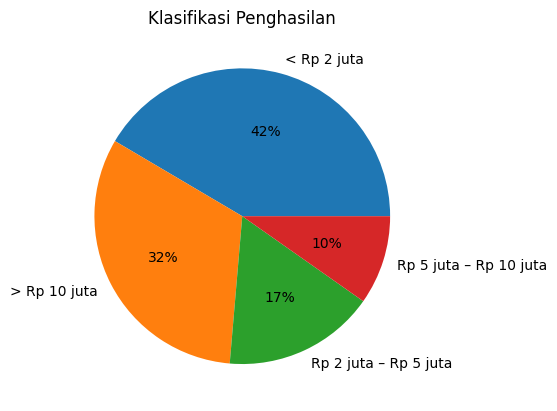

In [615]:
df['Penghasilan per Bulan'].value_counts().plot(kind="pie", title="Klasifikasi Penghasilan", autopct='%.0f%%')
plt.ylabel('')  # Menghilangkan label pada sumbu y
plt.show()

Insight:<br>Responden paling banyak memiliki penghasilan < 2 juta rupiah yang langsung diikuti oleh responden dengan gaji > 10 juta rupiah sebagai terbanyak kedua.

### **2. Histogram domisili responden**

C:\Users\Erwan\AppData\Local\Temp\ipykernel_25152\83039063.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #pemberian nama supaya lebih deskriptif


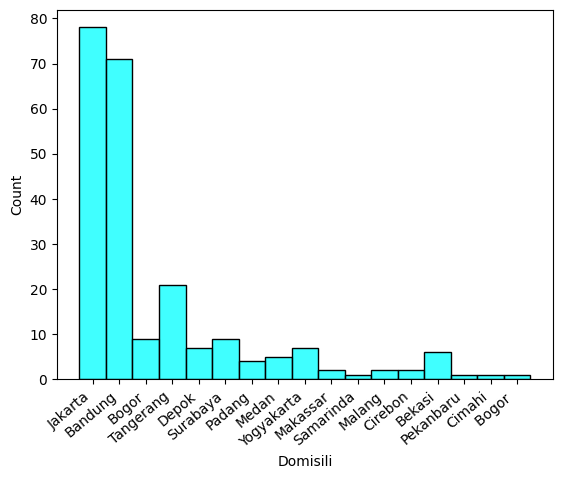

In [616]:
domisili = pd.DataFrame(df[df['Domisili'].duplicated()])
ax = sns.histplot(data=domisili, x="Domisili", color = 'cyan')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #pemberian nama supaya lebih deskriptif
plt.show()

Insight:<br>Responden terbanyak dan mendominasi pengisian survey ini berasal dari kota Jakarta dan Bandung

### **3. Scatter plot usia dengan durasi penggunaan internet**

<AxesSubplot: xlabel='Usia', ylabel='Durasi Penggunaan Internet per Hari (dalam Jam)'>

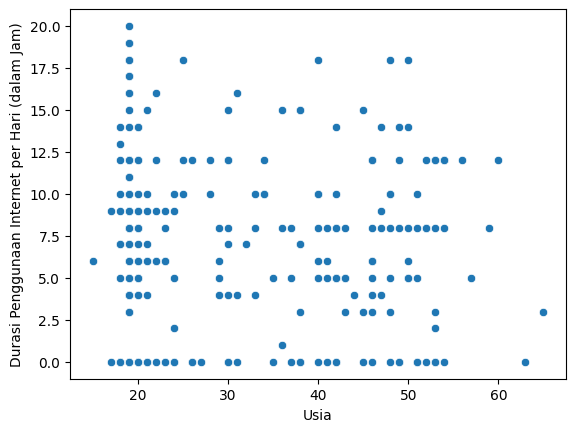

In [617]:
sns.scatterplot(data=df, x="Usia", y='Durasi Penggunaan Internet per Hari (dalam Jam)')

Insight:<br>1. Pengguna internet terbanyak dan terlama adalah responden dengan usia sekitar 20 tahun<br>2. Responden dengan usia sekitar 60 tahun tidak terlalu lama menggunakan internet<br>3. Data tidak terdistribusi normal

### **4. Donut chart proporsi tempat penggunaan QR**

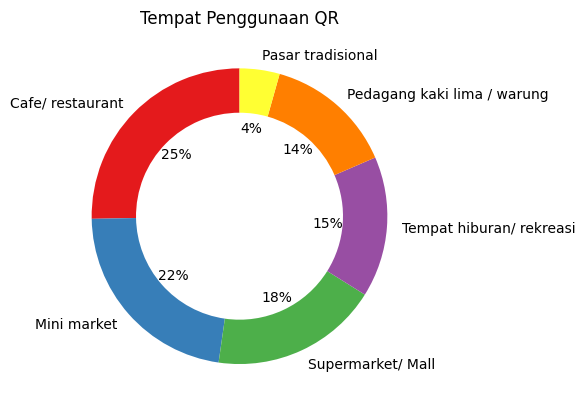

In [618]:
qr = df[['lokasi_qr_1', 'lokasi_qr_2', 'lokasi_qr_3', 'lokasi_qr_4', 'lokasi_qr_5', 'lokasi_qr_6']]

qr_count = qr.apply(lambda x: x.value_counts())
labels = ['Cafe/ restaurant', 'Mini market', 'Supermarket/ Mall', 'Tempat hiburan/ rekreasi', 'Pedagang kaki lima / warung', 'Pasar tradisional']
colors = plt.cm.Set1.colors
fig, ax = plt.subplots()
ax.pie(qr_count.sum(), labels=labels, autopct='%.0f%%', colors=colors, wedgeprops=dict(width=0.3), startangle=90)
centre_circle = plt.Circle((0, 0), 0.2, color='white', fc='white', linewidth=1.25)
plt.title('Tempat Penggunaan QR')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Insight:<br>Penggunaan QR terbesar adalah di cafe/restaurant diikuti oleh mini market dengan selisih 3% (25% dan 22%)

### **5. Stacked bar chart perbandingan frekuensi top up e-Money pada pria & wanita**

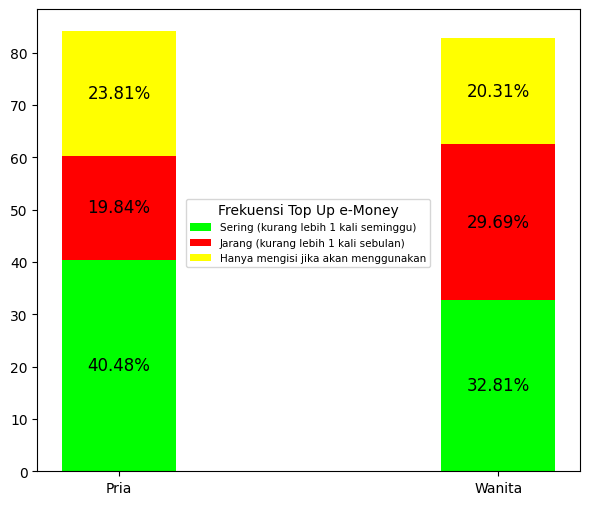

In [619]:
data = (df
      .groupby("Jenis Kelamin")["40. Berapa frekuensi top up/ Isi ulang ?"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (7,6))

ax.bar(data.index, data["Sering (kurang lebih 1 kali seminggu)"], label="Yes", width=0.3, color='lime')
ax.bar(data.index, data["Jarang (kurang lebih 1 kali sebulan) Sangat jarang"], bottom=data["Sering (kurang lebih 1 kali seminggu)"], label="No", width=0.3, color='red')
ax.bar(data.index, data["Hanya mengisi jika akan menggunakan"], bottom=data["Sering (kurang lebih 1 kali seminggu)"] + data["Jarang (kurang lebih 1 kali sebulan) Sangat jarang"], label="No", width=0.3, color='yellow')

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 12)
    
ax.legend(labels = ["Sering (kurang lebih 1 kali seminggu)", "Jarang (kurang lebih 1 kali sebulan)", "Hanya mengisi jika akan menggunakan"],
          fontsize = 7.5,
          title = "Frekuensi Top Up e-Money",
          title_fontsize = 10,
          bbox_to_anchor = [0.265, 0.6])

Catatan: Persentase tidak menyentuh 100% karena seluruh responden mengisi data "Jenis Kelamin" tapi ada yang tidak menigisi data "40. Berapa frekuensi top up/ Isi ulang ?".

Insight:<br>Pria lebih sering melakukan top up e-Money tapi juga banyak yang hanya mengisi jika akan menggunakan

### **6. Bar chart multivariable penghasilan dengan nominal top up**

C:\Users\Erwan\AppData\Local\Temp\ipykernel_25152\455140477.py:2: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  ax = sns.countplot(data=df, x="Penghasilan per Bulan", hue="39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?", palette=palette_color)
C:\Users\Erwan\AppData\Local\Temp\ipykernel_25152\455140477.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


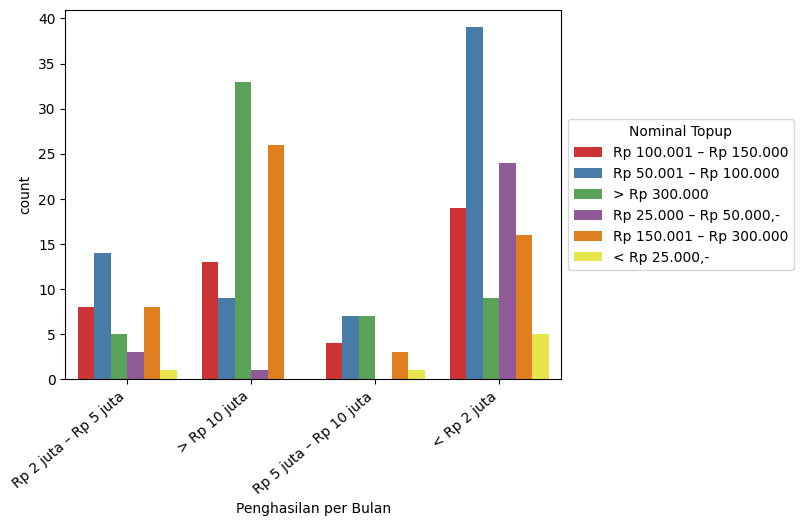

In [620]:
palette_color = sns.color_palette('Set1')
ax = sns.countplot(data=df, x="Penghasilan per Bulan", hue="39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?", palette=palette_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.legend(title='Nominal Topup', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Insight:<br>1. Responden dengan gaji < 2 juta rupiah paling banyak melakukan top up dengan nominal 50 - 100 ribu rupiah.<br>2. Responden dengan rentang gaji terbesar (> 10 juta) paling banyak melakukan top up senilai > 300 ribu rupiah.

# **Analysis**

### **Univariate**

#### **Analisis Confidence interval 95% for one-sample proportion<br>3 variabel yang berbeda, variabel bebas**

Confidence interval (CI) pada analisis univariat adalah suatu range nilai yang dihitung dari data sampel untuk memberikan perkiraan rentang nilai yang mungkin mengandung parameter populasi tertentu dengan tingkat kepercayaan tertentu. Confidence interval memberikan informasi tentang sejauh mana kita yakin bahwa parameter populasi berada dalam rentang tertentu berdasarkan data sampel yang kita miliki.

##### **Confidence interval pengguna layanan Mobile Banking**

In [621]:
total = len(df) # Check lagi
n = len(df.loc[df['layanan_aktif_1'] == 'Mobile Banking'])
p_hat = n/total
alpha = 0.95
MOE = m.sqrt(p_hat*(1-p_hat)/total)
z_alpha = stats.norm.interval(alpha, p_hat, MOE)
mbank_range = ((p_hat-MOE, p_hat+MOE))
mbank_hat = p_hat
mbank_err = MOE
print(f"P hat = {p_hat}")
print(f"Lower Bound: {z_alpha[0]}")
print(f"Upper Bound: {z_alpha[1]}")

P hat = 0.8592057761732852
Lower Bound: 0.8182467880075716
Upper Bound: 0.9001647643389988


Confidence interval pada responden yang menggunakan layanan internet banking adalah 16,8% - 26,5%, artinya hanya sekitar 21,6% (P hat) responden menggunakan layanan internet banking.

##### **Confidence interval pengguna layanan SMS Banking**

In [622]:
total = len(df) # Check lagi
n = len(df.loc[df['layanan_aktif_6'] == 'SMS Banking'])
p_hat = n/total
alpha = 0.95
MOE = m.sqrt(p_hat*(1-p_hat)/total)
z_alpha = stats.norm.interval(alpha, p_hat, MOE)
sms_range = ((p_hat-MOE, p_hat+MOE))
sms_hat = p_hat
sms_err = MOE
print(f"P hat = {p_hat}")
print(f"Lower Bound: {z_alpha[0]}")
print(f"Upper Bound: {z_alpha[1]}")

P hat = 0.05054151624548736
Lower Bound: 0.024744449370813323
Upper Bound: 0.0763385831201614


Confidence interval pada responden yang menggunakan layanan mobile banking adalah 81,8% - 90%, artinya lebih dari 81% responden menggunakan layanan mobile banking.

##### **Confidence interval pengguna layanan ATM**

In [623]:
total = len(df) # Check lagi
n = len(df.loc[df['layanan_aktif_2'] == 'ATM'])
p_hat = n/total
alpha = 0.95
MOE = m.sqrt(p_hat*(1-p_hat)/total)
z_alpha = stats.norm.interval(alpha, p_hat, MOE)
atm_range = ((p_hat-MOE, p_hat+MOE))
atm_hat = p_hat
atm_err = MOE
print(f"P hat = {p_hat}")
print(f"Lower Bound: {z_alpha[0]}")
print(f"Upper Bound: {z_alpha[1]}")

P hat = 0.5595667870036101
Lower Bound: 0.5011047152214789
Upper Bound: 0.6180288587857412


Confidence interval pada responden yang menggunakan layanan ATM adalah 50,1% - 61,8%, artinya hanya sekitar 55,9% (P hat) responden menggunakan layanan ATM.

#### **One sample Z-test for proportion (alpha = 5%)<br>(3 tes untuk variabel yang berbeda, variabel bebas)**
One-sample Z-test digunakan untuk untuk menguji hipotesis terkait proporsi dalam satu sampel, menggunakan distribusi Z dan tingkat signifikansi (alpha) sebesar 5%.

Dalam Z-test ini, kita menguji perbandingan antara proporsi sampel dengan nilai proporsi yang diharapkan dari populasi atau dengan nilai proporsi yang sudah diketahui sebelumnya. Tujuannya adalah untuk menentukan apakah perbedaan antara proporsi sampel dan nilai yang diharapkan signifikan secara statistik atau hanya terjadi secara kebetulan.

##### **H0  = Proporsi user yang menggunakan e-Money ShopeePay = 60%<br>H1  = Proporsi user yang menggunakan e-Money ShopeePay > 60%**

In [624]:
alpha = 0.05
n_proportion = int(df['emoney_pilihan_2'].value_counts())
n_total = df.shape[0]
p_hat = n_proportion/n_total
p0 = 0.6
z = (n_total*p_hat - n_total*p0)/m.sqrt(n_total*p0*(1-p0))
z_alpha = ndtri(1-alpha)
p_value = 2*(1-(norm.cdf(abs(z))))
result = z > z_alpha
z_m = z
z_alpha_m = z_alpha
print(f"Z = {z}")
print(f"Critical Region = Z > {z_alpha}")
print(f"P value = {p_value}")
print("Kesimpulan = FAIL TO REJECT")

Z = -1.0056997611747516
Critical Region = Z > 1.6448536269514722
P value = 0.31456001810837986
Kesimpulan = FAIL TO REJECT


##### **H0  = Proporsi user yang menggunakan e-Money untuk pembayaran e-Commerce = 70%<br>H1  = Proporsi user yang menggunakan e-Money untuk pembayaran e-Commerce ≠ 70%**

In [625]:
alpha = 0.95
po=0.70
ni=len(df.loc[df['penggunaan_emoney_3']== 'Pembayaran e-commerce'])
n=len(df)
phat=ni/n
z=(ni*phat-ni*po)/m.sqrt(ni*po*(1-po))
z_alpha=stats.norm.interval(alpha)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
print(f"Z = {z}")
print(f"Critical Region = Z > {z_alpha[1]} or Z < {z_alpha[0]}")
print(f"P value = {p_value}")
print("Kesimpulan = REJECT")

Z = -3.1078701496852754
Critical Region = Z > 1.959963984540054 or Z < -1.959963984540054
P value = 0.0018844084348841328
Kesimpulan = REJECT


##### **H0  = Proporsi user yang memiliki penghasilan > Rp 10 juta = 50%<br>H1  = Proporsi user yang memiliki penghasilan > Rp 10 juta < 50%**

In [626]:
alpha = 0.05
po=0.50
n_proportion = len(df.loc[df['Penghasilan per Bulan']== "> Rp 10 juta"])
n_total = df.shape[0]
p_hat = n_proportion/n_total
p0 = 0.5
z = (n_total*p_hat - n_total*p0)/m.sqrt(n_total*p0*(1-p0))
z_alpha = ndtri(1-alpha)
p_value = m.floor(norm.cdf(-z))
result = z < z_alpha
z_d = z
z_alpha_d = z_alpha
print(f"Z = {z}")
print(f"Critical Region = Z < {z_alpha}")
print(f"P value = {p_value}")
print("Kesimpulan = REJECT")

Z = -5.9483335044484855
Critical Region = Z < 1.6448536269514722
P value = 0
Kesimpulan = REJECT


#### **Chi-squared test for goodness-of-fit test dengan (alpha = 5% )<br>H0: data distribution = uniform distribution<br> H1: data distribution ≠ uniform distribution<br>(2 tes untuk variabel yang berbeda, variabel bebas)**

##### **Chi-squared test untuk frekuensi penggunaan mobile banking**

In [627]:
mobile = df['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ]'].value_counts().reset_index()
mobile.columns = ['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ]', 'Oi']
mobile['Ei'] = 1/4 * len(df)
mobile['(Oi - Ei)^2 / Ei'] = mobile.apply(lambda x: (x['Oi'] - x['Ei'])**2 / x['Ei'],
                                              axis = 1)
mobile

,18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ],Oi,Ei,(Oi - Ei)^2 / Ei
0,> 10 kali per bulan,141,69.25,74.340253
1,6-9 kali per bulan,58,69.25,1.827617
2,2-5 kali per bulan,36,69.25,15.964801
3,Kurang dari/ setidaknya 1 kali per bulan,7,69.25,55.957581
4,Tidak Pernah,2,69.25,65.307762


In [628]:
from scipy.stats import chisquare
def cs(n, y):
    return chisquare(n, np.sum(n)/np.sum(y) * y)
chi2, pval = cs(mobile['Oi'], mobile['Ei'])
alpha = 0.05
dof =  len(mobile) -1
chi2_alpha = st.chi2.ppf(1 - 0.05, dof)
result = chi2 > chi2_alpha
print(f"chi2 = {chi2}")
print(f"Critical Region = chi2 > {chi2_alpha}")
print(f"P value = {pval}")
print("Kesimpulan = REJECT")

chi2 = 259.9754098360655
Critical Region = chi2 > 9.487729036781154
P value = 4.616231408847731e-55
Kesimpulan = REJECT


##### **Chi-squared test untuk peningkatan aktivitas online**

In [629]:
aktivitas = df['Aktivitas Online Meningkat'].value_counts().reset_index()
aktivitas.columns = ['Aktivitas Online Meningkat', 'Oi']
aktivitas['Ei'] = 1/3 * len(df)
aktivitas['(Oi - Ei)^2 / Ei'] = aktivitas.apply(lambda x: (x['Oi'] - x['Ei'])**2 / x['Ei'],
                                              axis = 1)
aktivitas

,Aktivitas Online Meningkat,Oi,Ei,(Oi - Ei)^2 / Ei
0,Ya,143,92.333333,27.802647
1,Sama saja,96,92.333333,0.145608
2,Tidak,38,92.333333,31.972323


In [630]:
from scipy.stats import chisquare
def cs(n, y):
    return chisquare(n, np.sum(n)/np.sum(y) * y)
chi2, pval = st.chisquare(aktivitas['Oi'], aktivitas['Ei'])
alpha = 0.05
dof =  len(aktivitas) -1
chi2_alpha = st.chi2.ppf(1 - 0.05, dof)
result = chi2 > chi2_alpha
print(f"chi2 = {chi2}")
print(f"Critical Region = chi2 > {chi2_alpha}")
print(f"P value = {pval}")
print("Kesimpulan = REJECT")

chi2 = 59.92057761732852
Critical Region = chi2 > 5.991464547107979
P value = 9.73670235668666e-14
Kesimpulan = REJECT


### **Bivariate**

#### **Confidence interval 95% for two-sample proportion difference<br>(3 tes untuk sepasang variabel yang berbeda, pasangan variabel bebas)**

Confidence interval 95% for two-sample proportion difference adalah teknik statistik yang digunakan untuk mengestimasi rentang nilai yang mungkin dari perbedaan proporsi antara dua sampel, dengan tingkat kepercayaan 95%.

Dalam kasus ini, kita memiliki dua kelompok sampel yang ingin dibandingkan proporsinya, misalnya proporsi orang yang suka minum teh di dua kelompok yang berbeda. Confidence interval ini membantu untuk mengevaluasi seberapa besar perbedaan proporsi antara dua kelompok tersebut dengan menghitung rentang nilai yang mungkin untuk perbedaan proporsi, dengan tingkat keyakinan 95%.

##### **Confidence interval difference pengguna Mobile Banking dan ATM**

In [631]:
CL = 0.95
n_total=len(df)
n1=len(df.loc[df['layanan_aktif_1']=="Mobile Banking"])
n2=len(df.loc[df['layanan_aktif_2']=="ATM"])
p_hat1 = n1/n_total
p_hat2 = n2/n_total
half_alpha = (1-CL)/2
z_half_alpha = ndtri(1-half_alpha)
MOE= z_half_alpha*(m.sqrt(p_hat1*(1-p_hat1)/n_total + (p_hat2*(1-p_hat2)/n_total)))
lb=p_hat1-p_hat2-MOE
ub=p_hat1-p_hat2+MOE
print(f"Lower Bound: {lb}")
print(f"Upper Bound: {ub}")

Lower Bound: 0.2282565505126909
Upper Bound: 0.37102142782665937


Hasil diatas menunjukkan bahwa perbedaan propoorsi antara pengguna mobile banking dan atm cukup signifikan (22,8% - 37,1%).

##### **Confidence interval difference pengguna GoPay dan ShopeePay**

In [632]:
CL = 0.95
n_total=len(df)
n1=len(df.loc[df['emoney_pilihan_1']=="GoPay"])
n2=len(df.loc[df['emoney_pilihan_2']=="ShopeePay"])
p_hat1 = n1/n_total
p_hat2 = n2/n_total
half_alpha = (1-CL)/2
z_half_alpha = ndtri(1-half_alpha)
MOE= z_half_alpha*(m.sqrt(p_hat1*(1-p_hat1)/n_total + (p_hat2*(1-p_hat2)/n_total)))
lb=p_hat1-p_hat2-MOE
ub=p_hat1-p_hat2+MOE
print(f"Lower Bound: {lb}")
print(f"Upper Bound: {ub}")

Lower Bound: 0.09932448721377614
Upper Bound: 0.25446612650463535


Hasil diatas menunjukkan bahwa perbedaan propoorsi antara pengguna e-Money GoPay dan ShopeePay kurang signifikan, hanya 9,9% - 25,4%.

##### **Confidence interval difference pengguna Shopee dan Gojek (GoFood)**

In [633]:
CL = 0.95
n_total=len(df)
n1=len(df.loc[df['ecommerce_pilihan_1']=="Shopee"])
n2=len(df.loc[df['ecommerce_pilihan_2']=="Gojek (GoFood"])
p_hat1 = n1/n_total
p_hat2 = n2/n_total
half_alpha = (1-CL)/2
z_half_alpha = ndtri(1-half_alpha)
MOE= z_half_alpha*(m.sqrt(p_hat1*(1-p_hat1)/n_total + (p_hat2*(1-p_hat2)/n_total)))
lb=p_hat1-p_hat2-MOE
ub=p_hat1-p_hat2+MOE
print(f"Lower Bound: {lb}")
print(f"Upper Bound: {ub}")

Lower Bound: 0.009827484012380608
Upper Bound: 0.15623749793707803


Hasil diatas menunjukkan bahwa perbedaan propoorsi antara pengguna e-Commerce Shopee dan Gojek (GoFood) sangat tidak signifikan atau hampir tidak ada perbedaan (0.98% - 15,6%).

#### **Two-samples Z-test for proportion difference (alpha = 5%)<br>(3 tes untuk sepasang variabel yang berbeda, pasangan variabel bebas)**

##### **Z-test pada Traveloka dan Tiket.com dengan left-tailed test**

In [634]:
alpha = 0.05
n_proportion1=len(df.loc[df['ecommerce_pilihan_5']=="Traveloka"])
n_proportion2=len(df.loc[df["ecommerce_pilihan_7"]=="Tiket.com"])
n_total = len(df)
p_hat1 = n_proportion1/n_total
p_hat2 = n_proportion2/n_total
P = (n_proportion1 + n_proportion2)/(2*n_total)
Q = 1-P
z = (p_hat1 - p_hat2)/m.sqrt(P*Q*(2/n_total))
z_alpha = ndtri(1-alpha)
p_value = (norm.cdf(z))
print(f"Z = {z}")
print(f"Critical Region = Z < {z_alpha}")
print(f"P value = {p_value}")
print("Kesimpulan = FAIL TO REJECT")

Z = 1.76445203729647
Critical Region = Z < 1.6448536269514722
P value = 0.9611720481671426
Kesimpulan = FAIL TO REJECT


##### **Z-test pada e-Money Mandiri dan Flazz BCA dengan right-tailed test**

In [635]:
alpha=0.05
n_proportion1=len(df.loc[df['emoney_pilihan_5']=="eMoney Mandiri"])
n_proportion2=len(df.loc[df["emoney_pilihan_6"]=="Flazz BCA"])
n_total = len(df)
p_hat1 = n_proportion1/n_total
p_hat2 = n_proportion2/n_total
P = (n_proportion1 + n_proportion2)/(2*n_total)
Q = 1-P
z = (p_hat1 - p_hat2)/m.sqrt(P*Q*(2/n_total))
z_alpha = ndtri(1-alpha)
p_value = (norm.cdf(1-z))
print(f"Z = {z}")
print(f"Critical Region = Z > {z_alpha}")
print(f"P value = {p_value}")
print("Kesimpulan = FAIL TO REJECT")

Z = 0.9306805864372764
Critical Region = Z > 1.6448536269514722
P value = 0.5276323134410446
Kesimpulan = FAIL TO REJECT


##### **Z-test pada Shopee dan Tokopedia dengan two-tailed test**

In [636]:
alpha=0.05
n_proportion1=len(df.loc[df['ecommerce_pilihan_1']=="Shopee"])
n_proportion2=len(df.loc[df['ecommerce_pilihan_3']=="Tokopedia"])
n_total = len(df)
p_hat1 = n_proportion1/n_total
p_hat2 = n_proportion2/n_total
P = (n_proportion1 + n_proportion2)/(2*n_total)
Q = 1-P
z = (p_hat1 - p_hat2)/m.sqrt(P*Q*(2/n_total))
z_alpha = ndtri(1-alpha)
p_value = (norm.cdf(1-z))
print(f"Z = {z}")
print(f"Critical Region = Z > {z_alpha}")
print(f"P value = {p_value}")
print("Kesimpulan = REJECT")

Z = 2.7557193042832138
Critical Region = Z > 1.6448536269514722
P value = 0.03956817447478046
Kesimpulan = REJECT


#### **Chi-squared test for independence (alpha = 5%)<br>(2 tes untuk sepasang variabel yang berbeda, pasangan variabel bebas)**


##### **H0 = Pendidikan terakhir independen dengan penghasilan per bulan<br>H1 = Pendidikan terakhir tidak independen dengan penghasilan per bulan**

In [637]:
contigency1 = pd.crosstab(df['Pendidikan Terakhir'],
                            df['Penghasilan per Bulan'])
contigency1

Penghasilan per Bulan,< Rp 2 juta,> Rp 10 juta,Rp 2 juta – Rp 5 juta,Rp 5 juta – Rp 10 juta
Pendidikan Terakhir,,,,
D1,0,1,0,0
D3,5,7,6,0
D4,1,0,0,1
S1,19,54,22,19
S2,0,21,1,4
S3,0,1,0,0
SMA,89,5,17,3
SMP,1,0,0,0


In [638]:
Ei1 = contigency1.copy()

for s in contigency1.index:
    for o in contigency1.columns:
         Ei1.loc[s, o] = contigency1.loc[s].sum() * contigency1.loc[:, o].sum() / contigency1.values.sum()
            
Ei1

Penghasilan per Bulan,< Rp 2 juta,> Rp 10 juta,Rp 2 juta – Rp 5 juta,Rp 5 juta – Rp 10 juta
Pendidikan Terakhir,,,,
D1,0.415162,0.321300,0.166065,0.097473
D3,7.472924,5.783394,2.989170,1.754513
D4,0.830325,0.642599,0.332130,0.194946
S1,47.328520,36.628159,18.931408,11.111913
S2,10.794224,8.353791,4.317690,2.534296
S3,0.415162,0.321300,0.166065,0.097473
SMA,47.328520,36.628159,18.931408,11.111913
SMP,0.415162,0.321300,0.166065,0.097473


In [639]:
alpha = 0.05
chi2, pval, data, Ei1 = st.chi2_contingency(contigency1)
chi2_alpha = st.chi2.ppf(1 - 0.05, data)
print(f"chi2 = {chi2}")
print(f"Critical Region = chi2 > {chi2_alpha}")
print(f"P value = {pval}")
print("Kesimpulan = REJECT")

chi2 = 150.57647260928144
Critical Region = chi2 > 32.670573340917315
P value = 1.3644684752558475e-21
Kesimpulan = REJECT


##### **H0 = Pekerjaan independen dengan peningkatan aktivitas online<br>H1 = Pekerjaan tidak independen dengan peningkatan aktivitas online**

In [640]:
contigency2 = pd.crosstab(df['Pekerjaan'],
                            df['Aktivitas Online Meningkat'])
contigency2

Aktivitas Online Meningkat,Sama saja,Tidak,Ya
Pekerjaan,,,
Asisten dokter gigi anak2,0,0,1
Ibu Rumah Tangga,10,1,9
Insurance Agent,1,0,0
Karyawan BUMD,1,1,0
Karyawan Swasta,31,6,42
Konsultan Lingkungan,1,0,0
Mitra BPS Regsosek,0,0,1
Pedagang,1,0,0
Pegawai BUMD,0,1,0


In [641]:
Ei2 = contigency2.copy()

for s in contigency2.index:
    for o in contigency2.columns:
         Ei2.loc[s, o] = contigency2.loc[s].sum() * contigency2.loc[:, o].sum() / contigency2.values.sum()
            
Ei2

Aktivitas Online Meningkat,Sama saja,Tidak,Ya
Pekerjaan,,,
Asisten dokter gigi anak2,0.346570,0.137184,0.516245
Ibu Rumah Tangga,6.931408,2.743682,10.324910
Insurance Agent,0.346570,0.137184,0.516245
Karyawan BUMD,0.693141,0.274368,1.032491
Karyawan Swasta,27.379061,10.837545,40.783394
Konsultan Lingkungan,0.346570,0.137184,0.516245
Mitra BPS Regsosek,0.346570,0.137184,0.516245
Pedagang,0.346570,0.137184,0.516245
Pegawai BUMD,0.346570,0.137184,0.516245


In [642]:
alpha = 0.05
chi2, pval, data, Ei2 = st.chi2_contingency(contigency1)

chi2_alpha = st.chi2.ppf(1 - 0.05, data)
result = chi2 > chi2_alpha
print(f"chi2 = {chi2}")
print(f"Critical Region = chi2 > {chi2_alpha}")
print(f"P value = {pval}")
print("Kesimpulan = REJECT")

chi2 = 150.57647260928144
Critical Region = chi2 > 32.670573340917315
P value = 1.3644684752558475e-21
Kesimpulan = REJECT


#### **Chi-squared test for Homogenity (alpha = 5%)<br>(2 tes untuk sepasang variabel yang berbeda, pasangan variabel bebas)**

##### **H0 = Frekuensi channel Mobile Banking homogen dengan ATM<br>H1 = Frekuensi channel Mobile Banking  tidak homogen dengan ATM**

In [643]:
contigency3 = pd.crosstab(df['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ]'],
                            df['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [ATM]'])
contigency3

18. Bagaimana frekuensi penggunaan Channel Bank berikut? [ATM],2-5 kali per bulan,6-9 kali per bulan,> 10 kali per bulan,Kurang dari/ setidaknya 1 kali per bulan,Tidak Pernah
18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ],,,,,
2-5 kali per bulan,17,2,0,6,1
6-9 kali per bulan,23,8,3,9,1
> 10 kali per bulan,60,19,37,9,1
Kurang dari/ setidaknya 1 kali per bulan,2,0,0,5,0
Tidak Pernah,0,0,1,1,0


In [644]:
Ei3 = contigency3.copy()

for s in contigency3.index:
    for o in contigency3.columns:
         Ei3.loc[s, o] = contigency3.loc[s].sum() * contigency3.loc[:, o].sum() / contigency3.values.sum()
            
Ei3

18. Bagaimana frekuensi penggunaan Channel Bank berikut? [ATM],2-5 kali per bulan,6-9 kali per bulan,> 10 kali per bulan,Kurang dari/ setidaknya 1 kali per bulan,Tidak Pernah
18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ],,,,,
2-5 kali per bulan,12.936585,3.678049,5.2,3.804878,0.380488
6-9 kali per bulan,21.892683,6.224390,8.8,6.439024,0.643902
> 10 kali per bulan,62.692683,17.824390,25.2,18.439024,1.843902
Kurang dari/ setidaknya 1 kali per bulan,3.482927,0.990244,1.4,1.024390,0.102439
Tidak Pernah,0.995122,0.282927,0.4,0.292683,0.029268


In [645]:
alpha = 0.05
chi2, pval, dof3, Ei3 = st.chi2_contingency(contigency3)

chi2_alpha = st.chi2.ppf(1 - 0.05, dof3)
result = chi2 > chi2_alpha

print(f"chi2 = {chi2}")
print(f"Critical Region = chi2 > {chi2_alpha}")
print(f"P value = {pval}")
print("Kesimpulan = REJECT")

chi2 = 48.524365837753265
Critical Region = chi2 > 26.29622760486423
P value = 3.928081514371195e-05
Kesimpulan = REJECT


##### **H0 = Frekuensi channel Internet Banking homogen dengan SMS Banking<br>H1 = Frekuensi channel Internet Banking  tidak homogen dengan SMS Banking**

In [646]:
contigency4 = pd.crosstab(df['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Internet Banking ]'],
                            df['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [SMS Banking]'])
contigency4

18. Bagaimana frekuensi penggunaan Channel Bank berikut? [SMS Banking],2-5 kali per bulan,6-9 kali per bulan,> 10 kali per bulan,Kurang dari/ setidaknya 1 kali per bulan,Tidak Pernah
18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Internet Banking ],,,,,
2-5 kali per bulan,3,0,0,1,1
6-9 kali per bulan,0,3,1,1,0
> 10 kali per bulan,0,1,10,2,1
Kurang dari/ setidaknya 1 kali per bulan,0,0,0,7,4
Tidak Pernah,0,0,0,2,29


In [647]:
Ei4 = contigency4.copy()

for s in contigency4.index:
    for o in contigency4.columns:
         Ei4.loc[s, o] = contigency4.loc[s].sum() * contigency4.loc[:, o].sum() / contigency4.values.sum()
            
Ei4

18. Bagaimana frekuensi penggunaan Channel Bank berikut? [SMS Banking],2-5 kali per bulan,6-9 kali per bulan,> 10 kali per bulan,Kurang dari/ setidaknya 1 kali per bulan,Tidak Pernah
18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Internet Banking ],,,,,
2-5 kali per bulan,0.227273,0.303030,0.833333,0.984848,2.651515
6-9 kali per bulan,0.227273,0.303030,0.833333,0.984848,2.651515
> 10 kali per bulan,0.636364,0.848485,2.333333,2.757576,7.424242
Kurang dari/ setidaknya 1 kali per bulan,0.500000,0.666667,1.833333,2.166667,5.833333
Tidak Pernah,1.409091,1.878788,5.166667,6.106061,16.439394


In [648]:
alpha = 0.05
chi2, pval, dof4, Ei4 = st.chi2_contingency(contigency4)

chi2_alpha = st.chi2.ppf(1 - 0.05, dof4)
result = chi2 > chi2_alpha

print(f"chi2 = {chi2}")
print(f"Critical Region = chi2 > {chi2_alpha}")
print(f"P value = {pval}")
print("Kesimpulan = REJECT")

chi2 = 129.6998019952398
Critical Region = chi2 > 26.29622760486423
P value = 7.340284463198784e-20
Kesimpulan = REJECT


# **Data Insights**

#### *Pengguna layanan aktif Mobile Banking, ATM, dan SMS Banking*

Melalui analisis confidence intervel ketiga layanan aktif tersebut, didapatkan beberapa insight, antara lain:

**1. Layanan *mobile banking* memiliki pengguna terbanyak dengan P hat (rata - rata) senilai 85,9% sehingga menjadi layanan aktif dengan pengguna terbanyak dari data ini.**<br>**2. Layanan SMS *banking* menjadi layanan aktif dengan pengguna paling sedikit dengan P hat (rata - rata) senilai 5%.**

Poin diatas diperkuat dengan persentase pengguna pada pie chart dibawah ini.

Catatan: Data persentase dibawah berbeda dengan P hat karena sebaran data total pada confidence interval menggunakan perbandingan total (277), sedangkan persentase pada pie chart membandingkan jumlah antar pengguna layanan aktif.

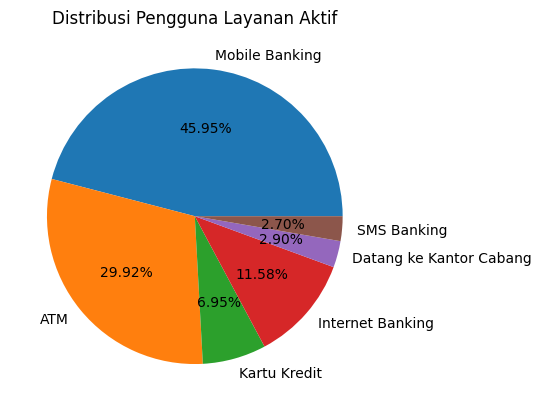

In [649]:
# Pilih kolom layanan dan kolom penghasilan
layanan = df[['layanan_aktif_1', 'layanan_aktif_2', 'layanan_aktif_3', 'layanan_aktif_4', 'layanan_aktif_5', 'layanan_aktif_6']]
label = ['Mobile Banking', 'ATM', 'Kartu Kredit', 'Internet Banking', 'Datang ke Kantor Cabang', 'SMS Banking']
# Membuat plot untuk setiap kolom layanan
plt.pie(layanan.count(), labels=label, autopct='%.2f%%')
plt.title("Distribusi Pengguna Layanan Aktif")
plt.show()

#### **Persebaran data 3 layanan aktif yang digunakan diatas divisualisasikan lebih detail pada persebaran data dan barchart confidence interval dibawah.**

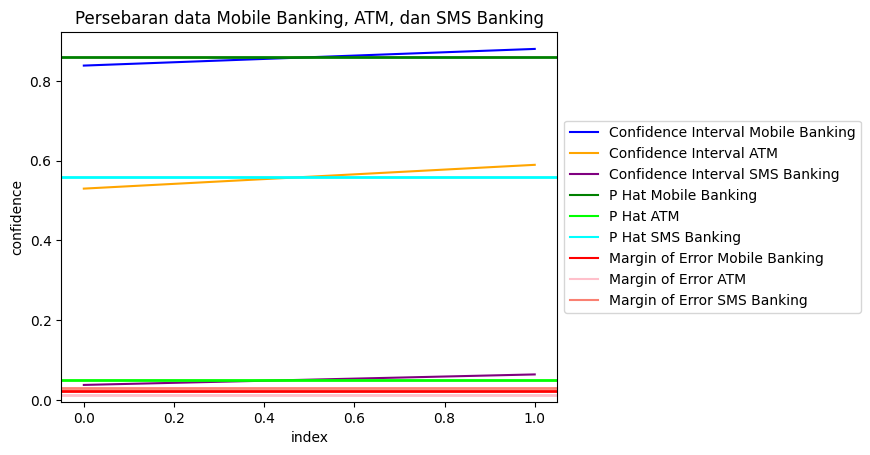

In [650]:
index = np.array([0, 1])
confidence = np.array([mbank_range[0], mbank_range[1]])
confidence3 = np.array([sms_range[0], sms_range[1]])
confidence2 = np.array([atm_range[0], atm_range[1]])
d = {'confidence': confidence, 'index' : index, 'confidence2': confidence2, 'confidence3': confidence3}
pdnum = pd.DataFrame(d)

ax = sns.lineplot(data=pdnum, x='index', y='confidence', label='Confidence Interval Mobile Banking', color = 'blue')
ax = sns.lineplot(data=pdnum, x='index', y='confidence2', label='Confidence Interval ATM', color = 'orange')
ax = sns.lineplot(data=pdnum, x='index', y='confidence3', label='Confidence Interval SMS Banking', color = 'purple')

ax.axhline(y=mbank_hat, linewidth=2, color='green', label='P Hat Mobile Banking')
ax.axhline(y=sms_hat, linewidth=2, color='lime', label='P Hat ATM')
ax.axhline(y=atm_hat, linewidth=2, color='cyan', label='P Hat SMS Banking')
ax.axhline(y=mbank_err, linewidth=2, color='red', label='Margin of Error Mobile Banking')
ax.axhline(y=sms_err, linewidth=2, color='pink', label='Margin of Error ATM')
ax.axhline(y=atm_err, linewidth=2, color='salmon', label='Margin of Error SMS Banking')

legend_elements = [
    Line2D([0], [0], color='blue', label='Confidence Interval Mobile Banking'),
    Line2D([0], [0], color='orange', label='Confidence Interval ATM'),
    Line2D([0], [0], color='purple', label='Confidence Interval SMS Banking'),
    Line2D([0], [0], color='green', label='P Hat Mobile Banking'),
    Line2D([0], [0], color='lime', label='P Hat ATM'),
    Line2D([0], [0], color='cyan', label='P Hat SMS Banking'),
    Line2D([0], [0], color='red', label='Margin of Error Mobile Banking'),
    Line2D([0], [0], color='pink', label='Margin of Error ATM'),
    Line2D([0], [0], color='salmon', label='Margin of Error SMS Banking')
]

ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Persebaran data Mobile Banking, ATM, dan SMS Banking")
plt.show()

C:\Users\Erwan\AppData\Local\Temp\ipykernel_25152\2417400797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( data=pdnum, x='index', y= 'confidence', palette = color)


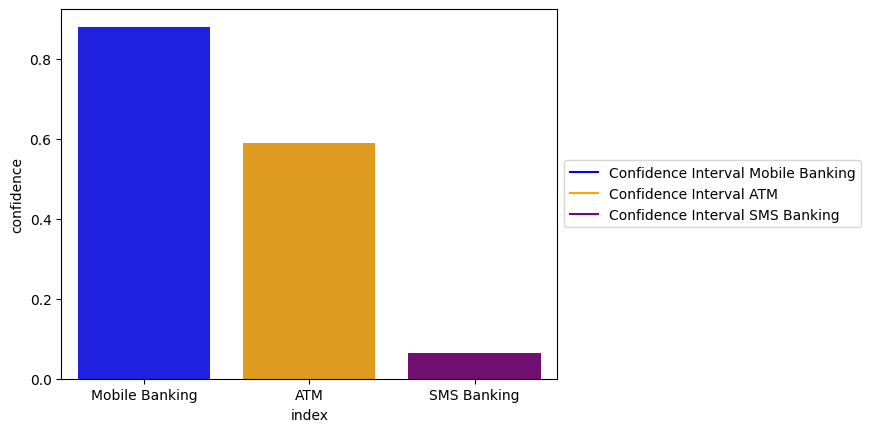

In [651]:
index = np.array(['Mobile Banking', 'ATM','SMS Banking'])
color = ['blue', 'orange', 'purple']
confidence = np.array([mbank_range[1], atm_range[1], sms_range[1]])
d = {'confidence': confidence, 'index' : index}
pdnum = pd.DataFrame(d)
ax = sns.barplot( data=pdnum, x='index', y= 'confidence', palette = color)

legend_elements = [
    Line2D([0], [0], color='blue', label='Confidence Interval Mobile Banking'),
    Line2D([0], [0], color='orange', label='Confidence Interval ATM'),
    Line2D([0], [0], color='purple', label='Confidence Interval SMS Banking')
]

ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### *Gojek dan persaingannya*

Setelah melihat distribusi pengguna layanan aktif, kita akan melihat bagaimana posisi Gojek serta produk layanannya sebagai salah satu produk digital nasional dengan pesaingnya.

**3. Produk GoPay unggul atas ShopeePay**
 
Melihat confidence interval difference pengguna GoPay dan ShopeePay sebagai salah satu produk dari kedua perusahaan digital tersebut, terlihat bahwa perbedaan distribusi keduanya memang tidak terlalu signifikan (9,9% - 25,4%), tapi Gojek tetap unggul atas Shopee dengan produk GoPay miliknya.


<function matplotlib.pyplot.show(close=None, block=None)>

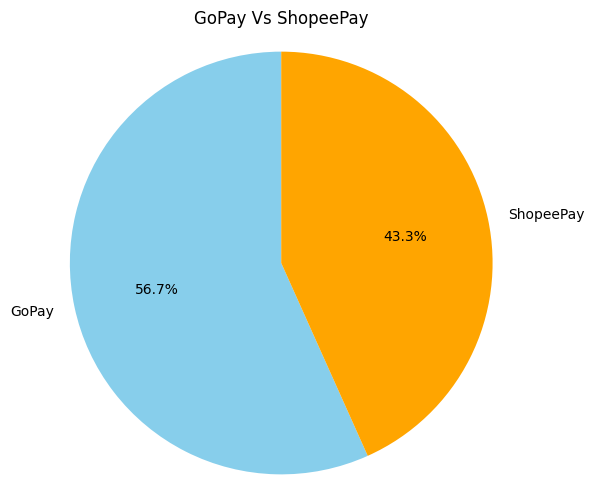

In [652]:
n_total = len(df)
n1=len(df.loc[df['emoney_pilihan_1']=="GoPay"])
n2=len(df.loc[df['emoney_pilihan_2']=="ShopeePay"])
p_hat1 = n1/n_total
p_hat2 = n2/n_total

labels = ['GoPay', 'ShopeePay']
sizes = [p_hat1, p_hat2]
colors = ['skyblue', 'orange']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('GoPay Vs ShopeePay')
plt.axis('equal')

# Menampilkan 
plt.show

**4. Gojek (GoFood) kalah atas Shopee sebagai e-Commerce dengan pengguna terbanyak**

Masih membahas persaingan Gojek dan Shopee sebegai perusahaan digital, melalui confidence interval difference, Shopee kali ini unggul atas Gojek (GoFood) sebagai e-Commerce pilihan responden.

<function matplotlib.pyplot.show(close=None, block=None)>

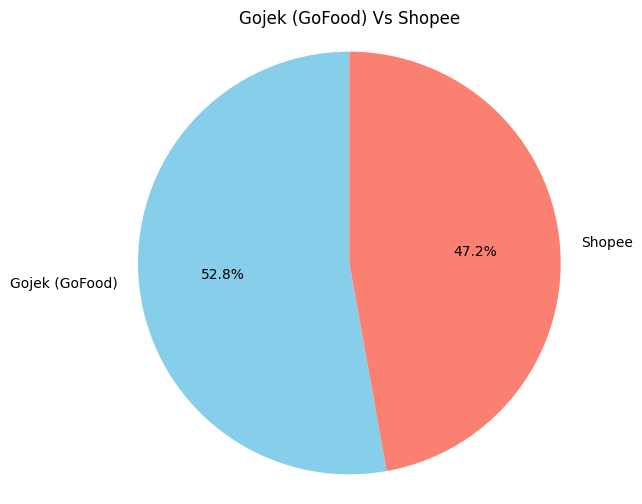

In [653]:
n_total=len(df)
n1=len(df.loc[df['ecommerce_pilihan_1']=="Shopee"])
n2=len(df.loc[df['ecommerce_pilihan_2']=="Gojek (GoFood"])
p_hat1 = n1/n_total
p_hat2 = n2/n_total

labels = ['Gojek (GoFood)', 'Shopee']
sizes = [p_hat1, p_hat2]
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Gojek (GoFood) Vs Shopee')
plt.axis('equal')

# Menampilkan 
plt.show

#### *Goodness-of-fit pengguna layanan mobile banking dan peningkatan aktivitas online*

**5. Distribusi pengguna layanan mobile banking dan peningkatan aktivitas online tidak layak dibuat model untuk prediksi**

Karena hasil keduanya **H1 REJECT H0**, maka kedua data ini tidak uniform (tidak sesuai ekspekstasi), sehingga tidak disarankan untuk dimodelkan.

#### *Traveloka VS Tiket.com*

**6. Perbedaan pengguna Traveloka dan Tiket.com tidak signifikan**

Melalui Z-test (left-tailed test) pada e-Commerce Traveloka dan Tiket.com sebagai 2 penyedia tiket online yang cukup terkemuka, didapatkan bahwa Z value tidak berada pada area critical region (baik < / >) yang memastikan **H1 FAIL TO REJECT H0** sehingga tidak ada cukup bukti statistik untuk menyimpulkan bahwa ada perbedaan signifikan antara rata-rata dari dua kelompok yang diuji (Perlu pengujian lebih lanjut).

#### *Hubungan pendidikan terakhir dengan penghasilan per bulan*

**7. Pendidikan terakhir berpengaruh terhadap penghasilan per bulan**

Melalui chi-squared test for independency, dapat dilihat bahwa hasil test pendidikan terakhir dengan penghasilan per bulan adalah H1 **REJECT** H0 yang berarti kedua variabel ini tidak saling independen atau memiliki hubungan yang saling mempengaruhi.

#### *Hubungan pekerjaan dengan peningkatan aktivitas online*

**8. Pekerjaan berpengaruh terhadap peningkatan aktivitas online.**
 
Melalui chi-squared test for independency, dapat dilihat bahwa hasil test pekerjaan dengan peningkatan aktivitas online  adalah H1 **REJECT** H0 yang berarti kedua variabel ini tidak saling independen atau memiliki hubungan yang saling mempengaruhi

#### *Homogenitas frekuensi layanan aktif*

**9. Frekuensi pengguna *mobile banking* tidak sama dengan pengguna ATM**

Melihat hasil chi-squared test for homogenity, disimpulkan bahwa frekuensi pengguna layanan aktif *mobile banking* tidak homogen (tidak sama) dengan pengguna ATM.

**10. Frekuensi pengguna *internet banking* tidak sama dengan pengguna SMS *banking***

Melihat hasil chi-squared test for homogenity, disimpulkan bahwa frekuensi pengguna layanan aktif *internet banking* tidak homogen (tidak sama) dengan pengguna SMS *banking*.

# SELESAI